In [21]:
import dmba
import pandas as pd
import numpy as np
import seaborn
from datetime import datetime as dt

In [22]:
df = dmba.load_data('LaptopSales.csv')

In [23]:
df.head()

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455.0,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545.0,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515.0,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395.0,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585.0,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0


In [24]:
df.info()
# Q1 Most of the data types shown are expected. However, it would be advantageous to convert the date column to a datetime format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297572 entries, 0 to 297571
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    297364 non-null  object 
 1   Configuration           297572 non-null  int64  
 2   Customer Postcode       297572 non-null  object 
 3   Store Postcode          297572 non-null  object 
 4   Retail Price            284129 non-null  float64
 5   Screen Size (Inches)    297572 non-null  int64  
 6   Battery Life (Hours)    297572 non-null  int64  
 7   RAM (GB)                297572 non-null  int64  
 8   Processor Speeds (GHz)  297572 non-null  float64
 9   Integrated Wireless?    297572 non-null  object 
 10  HD Size (GB)            297572 non-null  int64  
 11  Bundled Applications?   297572 non-null  object 
 12  customer X              297572 non-null  int64  
 13  customer Y              297572 non-null  int64  
 14  store X             

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297572 entries, 0 to 297571
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    297364 non-null  datetime64[ns]
 1   Configuration           297572 non-null  int64         
 2   Customer Postcode       297572 non-null  object        
 3   Store Postcode          297572 non-null  object        
 4   Retail Price            284129 non-null  float64       
 5   Screen Size (Inches)    297572 non-null  int64         
 6   Battery Life (Hours)    297572 non-null  int64         
 7   RAM (GB)                297572 non-null  int64         
 8   Processor Speeds (GHz)  297572 non-null  float64       
 9   Integrated Wireless?    297572 non-null  object        
 10  HD Size (GB)            297572 non-null  int64         
 11  Bundled Applications?   297572 non-null  object        
 12  customer X              297572

In [28]:
df.isna().sum()
# Q2: Retail price has a large number of null values, but other columns have few or no missing values

Date                        208
Configuration                 0
Customer Postcode             0
Store Postcode                0
Retail Price              13443
Screen Size (Inches)          0
Battery Life (Hours)          0
RAM (GB)                      0
Processor Speeds (GHz)        0
Integrated Wireless?          0
HD Size (GB)                  0
Bundled Applications?         0
customer X                    0
customer Y                    0
store X                     148
store Y                     148
dtype: int64

In [29]:
df = df.dropna()

In [30]:
df.isna().sum()

Date                      0
Configuration             0
Customer Postcode         0
Store Postcode            0
Retail Price              0
Screen Size (Inches)      0
Battery Life (Hours)      0
RAM (GB)                  0
Processor Speeds (GHz)    0
Integrated Wireless?      0
HD Size (GB)              0
Bundled Applications?     0
customer X                0
customer Y                0
store X                   0
store Y                   0
dtype: int64

In [32]:
df.info()
# Even after dropping the null rows, the DataFrame still has the vast majority of records.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283787 entries, 0 to 297571
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    283787 non-null  datetime64[ns]
 1   Configuration           283787 non-null  int64         
 2   Customer Postcode       283787 non-null  object        
 3   Store Postcode          283787 non-null  object        
 4   Retail Price            283787 non-null  float64       
 5   Screen Size (Inches)    283787 non-null  int64         
 6   Battery Life (Hours)    283787 non-null  int64         
 7   RAM (GB)                283787 non-null  int64         
 8   Processor Speeds (GHz)  283787 non-null  float64       
 9   Integrated Wireless?    283787 non-null  object        
 10  HD Size (GB)            283787 non-null  int64         
 11  Bundled Applications?   283787 non-null  object        
 12  customer X              283787

In [33]:
import matplotlib.pyplot as plt

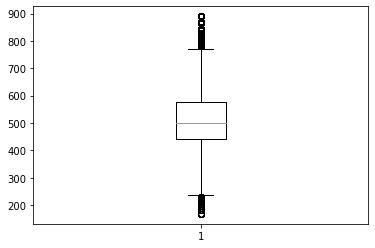

In [35]:
plt.boxplot(df['Retail Price'])
plt.show()

In [36]:
df['Retail Price'].median()

500.0

In [37]:
df['Retail Price'].mean()
# Q3 Median and Mean Laptop price are $500.00 and $508.12, respectively

508.1192443628496

In [38]:
df['Store Postcode'].value_counts()

SW1P 3AU    51753
SE1 2BN     44616
SW1V 4QQ    43451
NW5 2QH     31381
E2 0RY      30681
SE8 3JD     16583
SW18 1NN    14069
SW12 9HD    12673
W10 6HQ     11726
CR7 8LE      6604
W4 3PH       5500
N17 6QA      4738
KT2 5AU      4333
E7 8NW       3165
N3 1DH       2514
Name: Store Postcode, dtype: int64

In [41]:
df.groupby('Store Postcode').mean().sort_values(by = 'Retail Price')

,Configuration,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB),customer X,customer Y,store X,store Y
Store Postcode,,,,,,,,,,,
E7 8NW,370.957978,467.009163,15.786730,4.947551,2.103318,1.916177,129.826224,540733.196524,184943.369036,541428.0,184515.0
W4 3PH,376.498182,469.250182,15.792000,4.975636,2.104000,1.928164,133.130909,519242.751091,174884.265273,519585.0,177640.0
SW1P 3AU,377.233146,469.887620,15.800263,4.968813,2.109327,1.922661,132.581300,530517.092787,181086.725852,529902.0,179641.0
N3 1DH,384.428401,471.355211,15.824980,4.976134,2.140811,1.919133,127.939539,526517.410899,188197.437947,525109.0,190628.0
CR7 8LE,378.435494,471.843580,15.792247,4.986372,2.119624,1.929724,133.500909,533459.185494,169431.233949,532714.0,168302.0
SE1 2BN,378.852362,520.010983,15.809665,4.968083,2.097880,1.932777,132.006903,532787.443540,180657.182916,534057.0,179682.0
W10 6HQ,381.950196,520.043493,15.815282,4.981835,2.096879,1.931596,130.955142,525154.763773,181341.844875,524190.0,181567.0
E2 0RY,379.307682,520.208109,15.807992,4.973241,2.096868,1.932737,133.158632,534660.231055,182051.624523,535652.0,182961.0
SW18 1NN,378.451844,520.357168,15.809155,4.966451,2.094108,1.935034,133.395408,524826.175848,173245.477148,525155.0,175180.0


In [42]:
df.groupby('Store Postcode').median().sort_values(by = 'Retail Price')

,Configuration,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB),customer X,customer Y,store X,store Y
Store Postcode,,,,,,,,,,,
E7 8NW,341,460.0,15,5,2,2.0,80,540567,184356,541428.0,184515.0
CR7 8LE,347,465.0,15,5,2,2.0,80,533442,169306,532714.0,168302.0
SW1P 3AU,345,465.0,15,5,2,2.0,80,530424,181212,529902.0,179641.0
W4 3PH,342,465.0,15,5,2,2.0,80,518690,175862,519585.0,177640.0
N3 1DH,350,470.0,15,5,2,2.0,80,527242,187031,525109.0,190628.0
E2 0RY,348,510.0,15,5,2,2.0,80,533595,181767,535652.0,182961.0
KT2 5AU,348,510.0,15,5,2,2.0,80,518385,170070,517917.0,170243.0
N17 6QA,348,510.0,15,5,2,2.0,80,531449,186708,533788.0,189994.0
NW5 2QH,350,510.0,15,5,2,2.0,80,529643,182148,529248.0,185213.0


In [43]:
# Q4 An interesting finding was that stores with high mean prices did not necessarily have a high median price. In addition, the majority of stores actually had an equal median price! 
# Perhaps $510.00 is a common price point for laptops.

In [44]:
df.groupby('Integrated Wireless?').mean().sort_values(by = 'Retail Price')

,Configuration,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB),customer X,customer Y,store X,store Y
Integrated Wireless?,,,,,,,,,,,
No,390.232446,502.395987,15.828389,4.983987,2.127308,1.933561,132.933374,530771.844936,179890.982767,530687.503278,179798.660586
Yes,368.892969,513.902307,15.791465,4.960250,2.077113,1.924965,131.237071,530782.007495,179862.380494,530692.493242,179760.857378


In [45]:
df.groupby('Integrated Wireless?').median().sort_values(by = 'Retail Price')

,Configuration,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB),customer X,customer Y,store X,store Y
Integrated Wireless?,,,,,,,,,,,
No,361,495.0,15,5,2,2.0,80,531018,181081,529902.0,179641.0
Yes,339,505.0,15,5,2,2.0,80,531040,181078,529902.0,179641.0


In [46]:
# Q5 On average, laptops with integrated wireless cost around $12 more than those without.

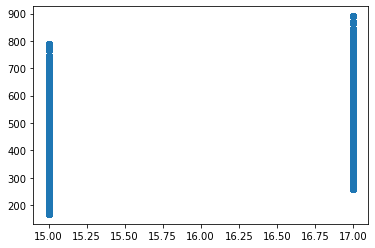

In [51]:
plt.scatter(df['Screen Size (Inches)'], df['Retail Price'])
plt.show()
# Q6 No surprise here! Larger screen laptops have a higher minimum and maximum price compared to smaller screen laptops

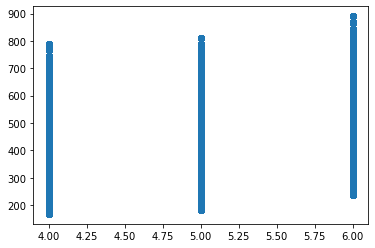

In [52]:
plt.scatter(df['Battery Life (Hours)'], df['Retail Price'])
plt.show()
# No surprise here! Laptops with a higher battery life have a higher minimum and maximum price compared to laptops with lower battery life

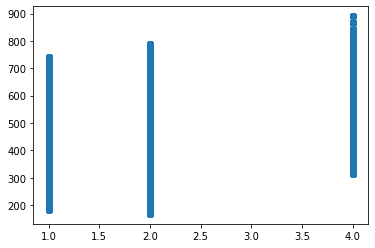

In [53]:
plt.scatter(df['RAM (GB)'], df['Retail Price'])
plt.show()
# No surprise here! Laptops with more powerful RAM tend to have a higher minimum and maximum price compared to laptops with less powerful RAM

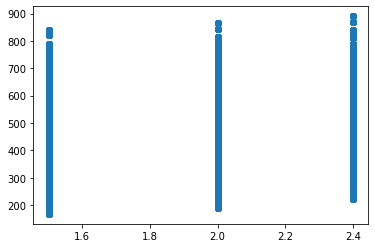

In [55]:
plt.scatter(df['Processor Speeds (GHz)'], df['Retail Price'])
plt.show()
# No surprise here! Laptops with faster processor speed have a higher minimum and maximum price compared to laptops with lower processor speed

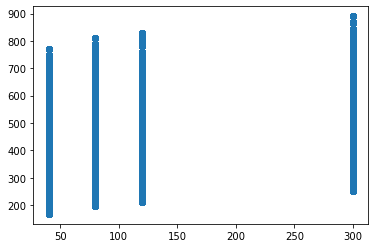

In [56]:
plt.scatter(df['HD Size (GB)'], df['Retail Price'])
plt.show()
# No surprise here! Laptops with larger HD size have a higher minimum and maximum price compared to laptops with smaller HD size

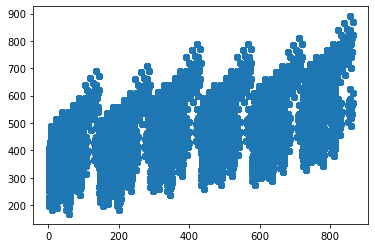

In [58]:
plt.scatter(df['Configuration'], df['Retail Price'])
plt.show()
# There is a repeating pattern between the configuration and price.

In [59]:
# Q6 Overall, the scatterplots could provide some utility but in most cases the distribution of values could have been better illustrated with boxplots

In [60]:
# Q7 In my opinion, I believe that RAM size bears the most influence on laptop price. I came to this conclusion by comparing the maximum prices between laptops of the 3 different RAM sizes